In [58]:
import os
import requests

def download_file(url, dest):
    print(f"Scarico: {url}")
    r = requests.get(url)
    if r.status_code == 200:
        with open(dest, "wb") as f:
            f.write(r.content)
        print(f"Salvato in: {dest}")
    else:
        print(f"Errore {r.status_code} nel download di {url}")
    


def ensure_project_files(base_url: str, file_paths: list):
    try:
        import google.colab  # noqa
        running_in_colab = True
        print("Google Colab")
    except ImportError:
        running_in_colab = False
        print("Locale / Jupyter")

    if(not running_in_colab):
        return
    
    for relative_path in file_paths:
        local_path = os.path.abspath(relative_path)

        #Crea le cartelle se non esistono
        folder = os.path.dirname(local_path)
        if folder != "" and not os.path.exists(folder):
            print(f"Creo cartella: {folder}")
            os.makedirs(folder, exist_ok=True)

        if os.path.exists(local_path):
            print(f"File già presente: {relative_path}")
        else:
            print(f"File mancante: {relative_path}")
            file_url = f"{base_url.rstrip('/')}/{relative_path}"
            download_file(file_url, local_path)
    
    print("Controllo completato.")

base_url = "https://raw.githubusercontent.com/fdalforno/personalFinance/refs/heads/main/"
file_paths = [
    "data/sample_prices.csv",
    "data/Portfolios_Formed_on_ME_monthly_EW.csv",
    "data/stock_data.csv",
    "data/index.csv"
]
ensure_project_files(base_url,file_paths) 

    

    

Locale / Jupyter



## Il rischio

Il secondo passo della mia avventura nella finanza personale è stato capire **come si misura il rischio**.

Quando si inizia a investire, capita spesso di sentire frasi come:

> *"Oggi le borse sono calate del 10%."*

Ma fermiamoci un attimo: **che cosa significa davvero un -10%?**

La domanda che voglio porvi è questa:

**Dopo un calo del 10%, quanto deve crescere un titolo o un indice per tornare al valore iniziale?**

Molti pensano che basti un +10%, ma non è così.

Se un investimento perde il 10%, il suo valore scende ad esempio da **100 a 90**.  
Per tornare a **100**, deve crescere non del 10%, ma dell'**11,11%**.  
Questo perché la crescita si calcola sul nuovo valore, più basso.

Comprendere questa dinamica è fondamentale per gestire il rischio e affrontare i movimenti del mercato con maggiore consapevolezza.

Per visualizzare meglio il concetto, proviamo a portare l'esempio all'estremo.  
Se un investimento perde il **50%**, il suo valore passa da 100 a **50**.  
Per tornare al valore iniziale non basta un +50%: servirebbe un **+100%**.

Ecco perché è così importante conoscere l'impatto reale delle perdite e quanto sia più difficile recuperare rispetto a perdere.

Quello che dobbiamo ricordarci è che quando si investe:
> **Si sale con le scale e si scende con l'ascensore**

per calcolare il guadagno a seguito di una perdita si usa la formuletta con $G$ guadagno e $P$ perdita:

$$
G = \frac{P}{1 - P}
$$

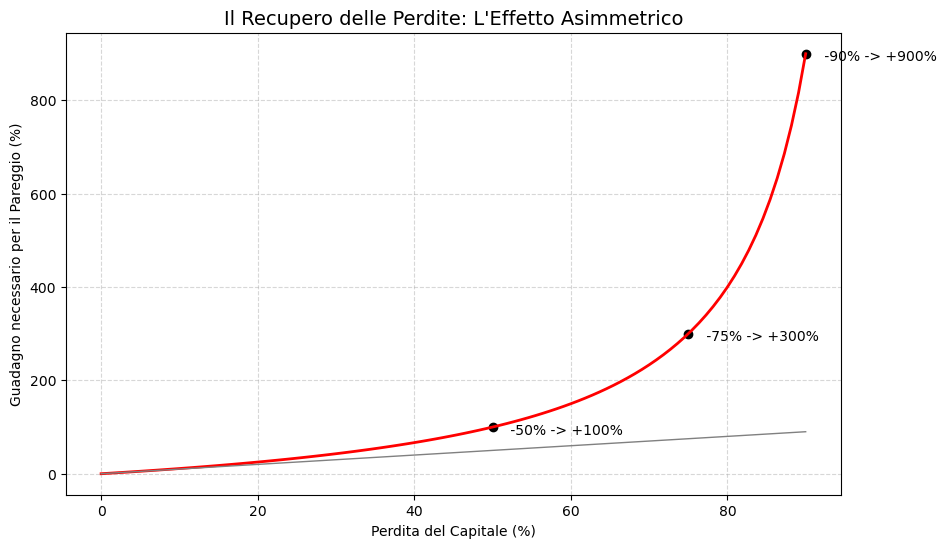

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generiamo i dati: perdite dallo 0% al 90%
perdite = np.linspace(0, 0.90, 100)

# Calcoliamo il guadagno necessario per il pareggio (Break-even)
guadagni_necessari = perdite / (1 - perdite)

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(perdite * 100, guadagni_necessari * 100, color='red', linewidth=2)
plt.plot(perdite * 100, perdite * 100, color='gray', linewidth=1, linestyle="-" , label="linea di simmetria")

# Evidenziamo alcuni punti chiave (Punto al 50% e 90%)
punti_chiave = [0.50,0.75,0.90]
for p in punti_chiave:
    g = p / (1 - p)
    plt.scatter(p*100, g*100, color='black')
    plt.annotate(f" -{p*100:.0f}% -> +{g*100:.0f}%", (p*100, g*100), 
                 textcoords="offset points", xytext=(10,-5), ha='left')

# Formattazione
plt.title('Il Recupero delle Perdite: L\'Effetto Asimmetrico', fontsize=14)
plt.xlabel('Perdita del Capitale (%)')
plt.ylabel('Guadagno necessario per il Pareggio (%)')
plt.grid(True, which='both', linestyle='--', alpha=0.5)

Ora lasciamo da parte il lato negativo delle percentuali e concentriamoci su un loro effetto estremamente vantaggioso negli investimenti: **il potere dell'interesse composto**.

Immaginiamo, per un momento, di poter investire una certa somma — diciamo i nostri **5 zecchini d’oro** — in un investimento che rende il **10% all'anno**, ipoteticamente **senza rischio**.  
*(È bene ricordare che questi dati sono puramente illustrativi: non esistono investimenti reali che garantiscano un rendimento del 10% annuo senza alcun rischio.)*

A questo punto la domanda è:

**In quale situazione si troverebbe il nostro Pinocchio dopo X anni grazie all'interesse composto?**

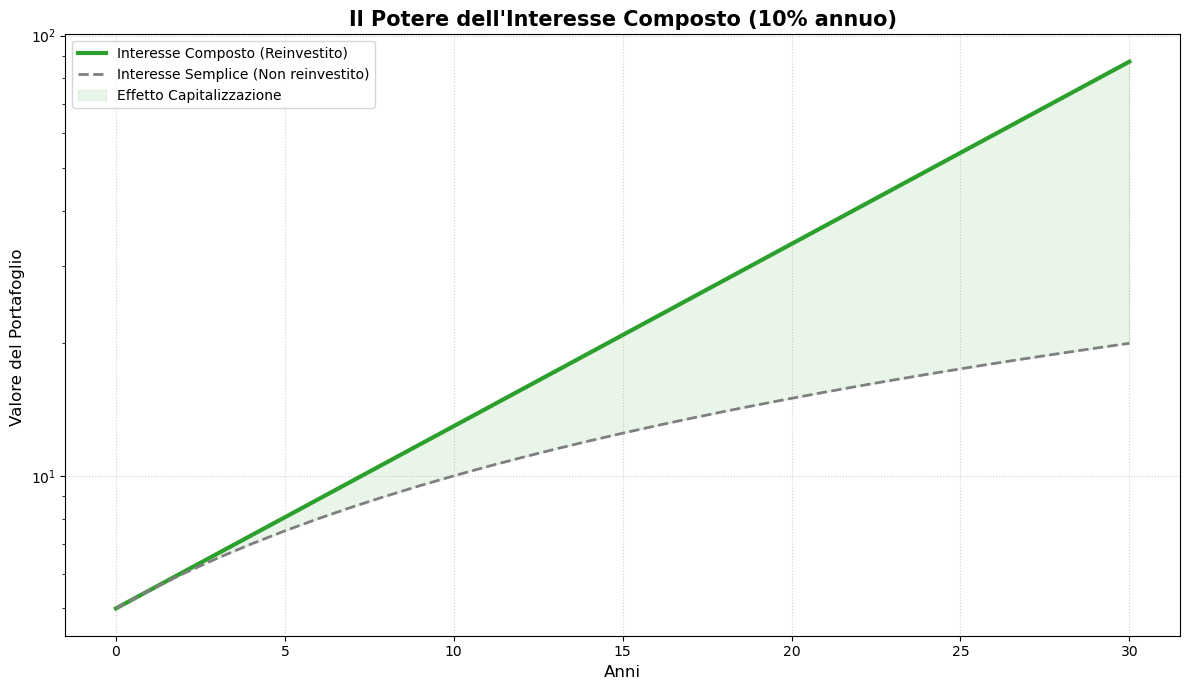

In [3]:
# Parametri
capitale_iniziale = 5
tasso_annuo = 0.1 # 10% di rendimento medio
anni = 30

# Calcoli
tempo = np.arange(0, anni + 1)
interesse_semplice = capitale_iniziale * (1 + tasso_annuo * tempo)
interesse_composto = capitale_iniziale * (1 + tasso_annuo) ** tempo

# Creazione del grafico
plt.figure(figsize=(12, 7))

# Linee principali
plt.plot(tempo, interesse_composto, label='Interesse Composto (Reinvestito)', color='#2ca02c', linewidth=3)
plt.plot(tempo, interesse_semplice, label='Interesse Semplice (Non reinvestito)', color='#7f7f7f', linestyle='--', linewidth=2)

# Evidenziamo il "punto di decollo"
plt.fill_between(tempo, interesse_semplice, interesse_composto, color='#2ca02c', alpha=0.1, label='Effetto Capitalizzazione')

plt.yscale('log')

# Formattazione
plt.title(f'Il Potere dell\'Interesse Composto ({tasso_annuo*100:.0f}% annuo)', fontsize=15, fontweight='bold')
plt.xlabel('Anni', fontsize=12)
plt.ylabel('Valore del Portafoglio ', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

plt.tight_layout()

Il grafico mostra due linee:

- la **linea tratteggiata** rappresenta l'interesse calcolato sui nostri 5 zecchini senza reinvestire i guadagni (interesse semplice);
- la **linea superiore**, che a prima vista potrebbe sembrare quasi una retta, in realtà cresce in modo **esponenziale** grazie all'interesse composto.

Se osservate la scala dell'asse **Y**, noterete che è **logaritmica**: per questo la crescita esponenziale appare visivamente molto più lineare.

Ora, l'interesse composto — per noi che non siamo macchine — può risultare non immediato da comprendere.  
Per fortuna esiste una semplice regola che ci aiuta a stimarne gli effetti.

## Regola del 72

La Regola del 72 permette di stimare in modo rapido ogni quanto un investimento **raddoppia di valore** con l'interesse composto.  
Basta dividere 72 per il tasso di interesse.

Esempi:

- un tasso dell'**8%** → raddoppia in **9 anni** (72 / 8)
- un tasso del **10%** → raddoppia in **7,2 anni**
- un tasso del **12%** → raddoppia in **6 anni**

Come esercizio finale, concediamoci un sorriso.  
Forse anche a voi è arrivata una telefonata che promette investimenti miracolosi con rendimenti del **7–10% mensile**.

Ora voglio calcolare con voi il famoso **"time to Elon Musk"**:  
se questi rendimenti fossero veri, in quanti anni potremmo partire con un capitale di 1000 euro e arrivare alla ricchezza di Elon Musk?
Ad oggi la ricchezza di Eelon Musk è stimata attorno ai 700 miliardi di euro.

$$
t = \frac{\ln\left(\frac{C(t)}{C_0}\right)}{\ln(1 + r)}
$$


In [4]:

import math
initial=1000
target=700_000_000_000

# monthly rates 7% and 10%
for r in [0.07,0.10]:
    months=math.log(target/initial)/math.log(1+r)
    years = months / 12
    print(f"{r*100:.0f}% al mese -> {years:.2f} anni")


7% al mese -> 25.08 anni
10% al mese -> 17.81 anni


Come potete vedere, il **10% al mese** può sembrare un valore relativamente piccolo, ma grazie al potere dell'interesse composto diventa qualcosa di incredibilmente potente.

Con un rendimento del 10% mensile, in **circa 19,78 anni** si potrebbe teoricamente raggiungere un capitale paragonabile a quello di Elon Musk.

Altro che mettere da parte i soldi per l'università dei figli…  
con numeri del genere potremmo quasi pensare di *viaggiare per sempre*!

Naturalmente questo esempio è volutamente provocatorio:  
rendimenti del 7–10% **al mese** sono irrealistici e spesso associati a truffe.  
Se fossero davvero possibili, trasformerebbero chiunque in un miliardario nel giro di pochi decenni.

## Valutazione del rischio

Abbiamo visto quanto una perdita in percentuale può fare male, e quanto se abbiamo pazienza possiamo ottenere da un investimento ora la mia domanda è questa come possiamo confrontare due investimenti?

Supponiamo di poter scegliere tra due società la famosa **Blue** e la famosa **Orange** società di tutto rispetto, ho preparato questo esempio che mostra i prezzi delle azioni al variare del tempo


In [5]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


Da investitore ingenuo ci verrebbe da dire **All in** su Orange ma come avrete intuito a me piacciono gli scherzi facciamo due conti vediamo in percentuale quanto questi investimenti hanno reso in media

In [6]:
ret = prices.pct_change() * 100
ret.dropna(inplace=True)

ret.mean()

BLUE      0.999991
ORANGE    0.999986
dtype: float64

Eccoci arrivati in media le due aziende si sono comportate allo stesso modo perciò sembra che scegliere BLUE o scegliere ORANGE non cambi nulla, ma vediamo come si sono comportati i rendimento nel dettaglio:

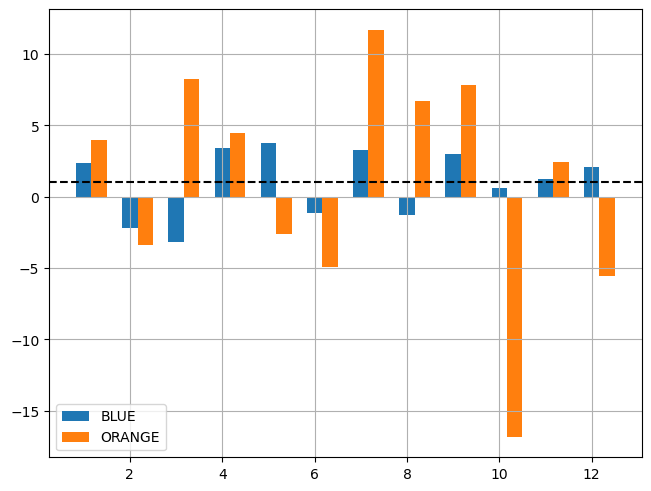

In [7]:
fig, ax = plt.subplots(layout='constrained')

columns = ret.columns

width = 1 / (len(columns) + 1)  # the width of the bars
multiplier = 0

x = ret.index

for col in ret.columns:
    offset = width * multiplier
    rects = ax.bar(x + offset,ret[col], width, label=col)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    
plt.axhline(y=1, color='k', linestyle='--')
plt.grid()
plt.legend(loc="lower left")

Altra lezione importante da imprimerci nella testa, il rendimento medio non è un buon indicatore per confrontare gli investimenti.
Un buon modo per capire l'andamento potrebbe essere quello di simulare lo stesso investimento sulle due azioni.
Supponiamo di partire con la stessa cifra 1000€

In [8]:
initial_investment = 1000

Cosa sarebbe successo se avessimo scelto BLUE o ORANGE ?

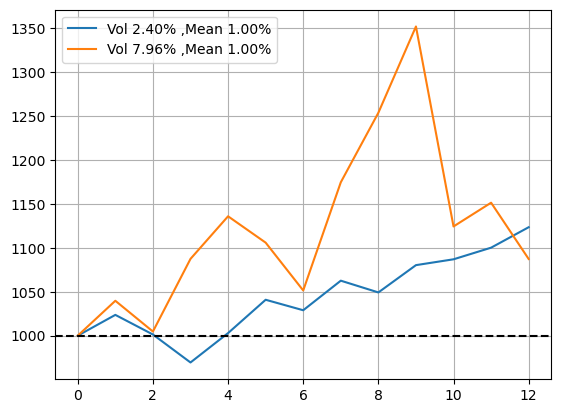

In [9]:
for col in ret.columns:
    values = [initial_investment]
    label = "Vol {0:.2f}% ,Mean {1:.2f}%".format(ret[col].std(),ret[col].mean())
    for r in ret[col].values:
        new_value = values[-1] * (1 + r/100)
        values.append(new_value)
    plt.plot(range(len(values)),values,label=label)
    
plt.axhline(y=initial_investment, color='k', linestyle='--')
plt.grid()
plt.legend(loc="upper left")

Dal grafico possiamo vedere come l'investimento in **ORANGE** abbia ottenuto ottimi risultati per buona parte dell'anno, per poi calare sensibilmente verso la fine.

Questo ci permette di fissare un concetto molto importante:

**A parità di rendimento medio, due investimenti possono avere comportamenti molto diversi.**

Restando sul tema dei rendimenti, e senza includere i dividendi per mantenere l'esempio semplice, possiamo ora chiederci:

**Come si calcola il rendimento totale quando abbiamo una serie di rendimenti periodici?**

Definiamo come rendimento la seguente formula:

$$
R_{t,t+1} = \frac{P_{t+1} - P_{t}}{P_{t}}
$$

Con $P_{t+1}$ il prezzo al tempo $t+1$ e $P_{t}$ il prezzo attuale.
La stessa formula può essere definita in modo più efficiente da un punto di vista computazione come:

$$1+r =  \frac{P_{t+1}}{P_{t}}$$

supponiamo di aver acquistato una azione a 10€ e averla venduta a 12€ avremo che

In [10]:
buy = 10
sell = 12

In [11]:
(sell - buy) / buy

0.2

In [12]:
sell / buy

1.2

Supponiamo ora di valutare il rendimento su più periodi il rendimento finale sarà paria a

$$
R_{t,t+2} = (1 + R_{t,t+1})(1 + R_{t+1,t+2}) - 1
$$

*Esempio:* supponiamo di investire in una azione che il primo giorno rende il +10% e il secondo giorno rende il -3% non avremo un rendimento totale del 7% ma bensi: 

In [13]:
ret = [0.1,-0.03]
round(np.prod(np.array(ret) + 1) - 1,4)

np.float64(0.067)

Ora la domanda è come confrontiamo due rendimenti ad esempio un giornaliero o un mensile e un annuale, la risposta è l'annualizzazione, cioè ragioniamo come se il rendimento fosse continuativo per un anno ad esempio:

se abbiamo un ritorno mensile dell'1% il rendimento annualizzato sarà del 12% ?, sbagliato il rendimento sarà:

In [14]:
ret = [0.01] * 12
round(np.prod(np.array(ret) + 1) - 1,4)

np.float64(0.1268)

bensi un 12.68%.
Torniamo dunque ai nostri inventimenti in Blue o Orange analizziamo il rendimento sull'intero periodo

In [15]:
retu = prices.pct_change() + 1
retu.prod(axis=0) - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

Abbiamo dunque che il rendimento di Blue sarà del 12,33% mentre Orange darà un rendimento del 8,71%

# Rischio

Passiamo ora a un altro argomento altrettanto importante — anzi, quasi più importante del rendimento: **la volatilità**.

Riprendiamo il confronto tra gli investimenti **Blue** e **Orange**.  
Abbiamo visto che, pur avendo la stessa media dei rendimenti, l’investimento Orange risulta più “rischioso”, perché i suoi rendimenti **si scostano di più dalla media** rispetto a quelli di Blue.

Definiamo quindi questo concetto, che in statistica è chiamato **Varianza**:

$$
\sigma^{2}_{R} = \frac{1}{N}\sum_{i=1}^{N}\left(R_i - \overline{R}\right)^2
$$

Con $\overline{R}$ che rappresenta la media della serie di valori dei rendimenti. 
Questo valore a volte e difficile da comprendere perciò si tende ad utilizzare la deviazione standard calcolando la radice quadrata di $\sigma^2$

$$
\sigma_{R} = \sqrt{\frac{1}{N}\sum_{i=1}^{N}\left(R_i - \overline{R}\right)^2}
$$

Non possiamo comparare direttamente la volatilità di un giorno con quella ad esempio mensile va eseguita l'operazione di annualizzazione come fatto per i rendimenti e la formula è


$$
\sigma_{ann} = \sigma_{p} \sqrt{p}
$$

ad esempio supponiamo che la volatilità giornaliera di 

In [16]:
vol = 0.01

in un anno ci sono all'incirca 252 giorni in cui la borsa è aperta perciò

In [17]:
vol * math.sqrt(252)

0.15874507866387544

Cominciamo ora a osservare qualcosa di più serio: analizziamo la **volatilità del mercato azionario statunitense**, suddiviso in due categorie principali:

- **Small Caps**: società con capitalizzazione di mercato relativamente bassa, generalmente tra **300 milioni** e **2 miliardi** di dollari.
- **Large Caps**: società con capitalizzazione superiore ai **10 miliardi** di dollari.

I dati che utilizzeremo sono gratuiti e possono essere recuperati dal sito del celebre studioso di finanza **Kenneth French**, un vero e proprio punto di riferimento per l'analisi accademica dei mercati.

In [18]:
# i file aggiornati possono essere recuperati aggiornati dal sito di Fama e French 
# https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0, index_col=0, na_values=-99.99)

In [19]:
me_m.index = pd.to_datetime(me_m.index, format = '%Y%m')
cols = ['Lo 10', 'Hi 10']
returns = me_m[cols]
returns

,Lo 10,Hi 10
1926-07-01,-1.45,3.29
1926-08-01,5.12,3.70
1926-09-01,0.93,0.67
1926-10-01,-4.84,-2.43
1926-11-01,-0.78,2.70
...,...,...
2018-08-01,2.41,2.34
2018-09-01,-1.68,0.87
2018-10-01,-10.02,-6.57
2018-11-01,-3.65,2.53


I dati sono dati in percentuale 5.4 invece che 0.045 dividiamo per 100 per ottenere il valore corretto

In [20]:
returns = returns/100
returns.columns = ['SmallCap', 'LargeCap']

mostriamo ora un grafico a barre per analizzare i rendimenti mensili dei due gruppi

<Axes: >

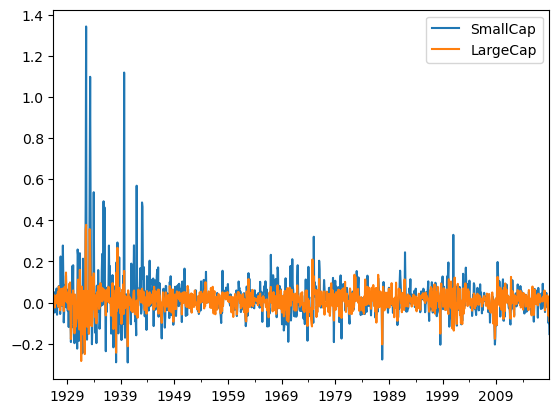

In [21]:
returns.plot()

calcoliamo la volatilità annualizzata

In [22]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

Vediamo subito che l'investimento nelle **Small Cap** mostra una **volatilità maggiore** rispetto alle Large Cap.

Se poi annualizziamo il rendimento — e ricordiamo che **non possiamo usare la media semplice**, ma dobbiamo comporre i rendimenti — osserviamo che:

- il **rendimento mensile** delle Small Cap è superiore,
- e anche il **rendimento annualizzato** risulta più elevato.

In sintesi, le Small Cap offrono rendimenti più alti, ma a fronte di una maggiore volatilità.

In [23]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [24]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

A fronte di una maggiore volatilità, le **Small Cap** presentano anche un **rendimento annualizzato più elevato**.

Sorge quindi una domanda fondamentale:

**Come possiamo confrontare in modo corretto questi due tipi di investimenti?**

Una risposta semplice è valutare il **rapporto tra rendimento e rischio**, cioè misurare quanto rendimento otteniamo **per ogni unità di volatilità**.

In [25]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

Potremmo essere tentati di dire che le **Small Cap** non siano poi così migliori delle Large Cap.
Facciamo però un piccolo aggiustamento importante: invece di considerare solo il rendimento assoluto, analizziamo l'**eccesso di rendimento**, cioè quanto l'investimento rende *in più* rispetto a un investimento considerato **risk‑free**.

### Cos'è il “risk‑free” per un investitore europeo?

Il risk‑free è un rendimento di riferimento teoricamente privo di rischio di credito e con volatilità molto bassa.  
Per gli investitori statunitensi si usano di solito i **Treasury Bills** a brevissima scadenza.

Per un investitore europeo gli equivalenti più comuni sono:
- i **Bund tedeschi** a breve termine (considerati tra i più sicuri in Europa),
- oppure i **BOT italiani** a brevissima scadenza, anche se con un profilo di rischio leggermente superiore.

L'obiettivo è misurare quanto un investimento rende in più rispetto a questo livello minimo di rendimento quasi privo di rischio.

### Sharpe Ratio

Una volta calcolato l'eccesso di rendimento, possiamo ottenere un indicatore fondamentale:

**lo Sharpe Ratio**, che misura quanto rendimento extra otteniamo per ogni unità di rischio assunta.

> Lo Sharpe Ratio prende il nome da William F. Sharpe, un economista americano nato nel 1934 a Boston e vincitore del Premio Nobel per l'Economia nel 1990 per il suo contributo allo sviluppo della teoria della finanza moderna.

Supponiamo allora che i il risk free sia pari al 3%

In [26]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

## Misurare il drawdown

Introduciamo ora un'altra misura del rischio.
Alcune persone sostengono che la **volatilità** non sia necessariamente negativa: se ci si discosta dalla media in positivo, non è certo un problema.

Per questo motivo può essere utile misurare il rischio in termini di **probabilità di perdere denaro**.  
L'indicatore che useremo si chiama **Max Drawdown**, che possiamo tradurre come *perdita massima*.

## Cos'è il Max Drawdown?

Il **Max Drawdown** rappresenta la peggiore perdita che un investitore avrebbe subito se avesse comprato un asset al suo **massimo locale** e lo avesse venduto al **minimo successivo**.

In altre parole, misura la **peggior caduta percentuale** del valore rispetto al massimo precedente.

## Come si calcola?

1. Calcolare l'**indice patrimoniale** (equity line) nel tempo.  
2. Identificare il **massimo cumulato** fino a ogni istante.  
3. Misurare il calo percentuale dal massimo.  
4. Il **max drawdown** è il calo più grande mai registrato.


In [27]:
returns.index = returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


<Axes: >

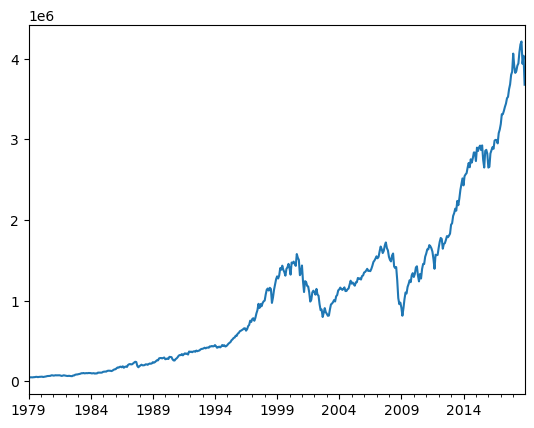

In [28]:
start = "1979"

wealth_index = initial_investment*(1+returns["LargeCap"]).cumprod()
wealth_index[start:].plot()

Si prosegue con il calcolo del massimo locale

<Axes: >

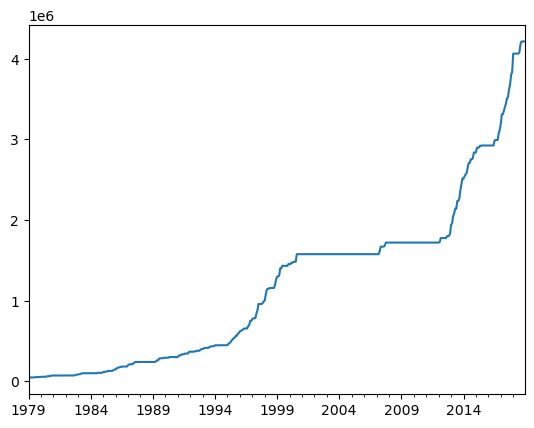

In [29]:
previous_peaks = wealth_index.cummax()
previous_peaks[start:].plot()

<Axes: >

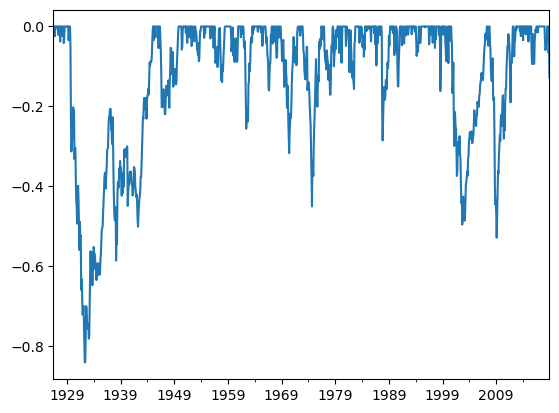

In [30]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

Questo valore è molto utilizzato perché misura **quanto denaro senti davvero di aver perso**, ed è quindi molto coerente con gli effetti comportamentali che influenzano il nostro modo di investire.

A differenza della volatilità, che può essere tecnica e controintuitiva, il drawdown rappresenta una perdita concreta: indica quanto il capitale è sceso dal suo massimo precedente.

Ora creiamo una **funzione che calcoli il drawdown** e mettiamo a confronto le **Large Cap** e le **Small Cap**.

In [31]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [32]:
drawdown(returns["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


Se siete curiosi come me, vorreste sicuramente sapere **quali sono stati i momenti in cui investire in questo indice ci avrebbe fatto strappare i capelli**.

Per scoprirlo, ordiniamo i periodi di drawdown in modo da individuare i nostri **peggiori momenti**, cioè le fasi di perdita più profonda.

In [33]:
drawdown(returns["LargeCap"]).sort_values(by="Drawdown").head()

,Wealth,Previous Peak,Drawdown
1932-05,405.769102,2536.651856,-0.840038
1932-06,409.664485,2536.651856,-0.838502
1932-04,541.458636,2536.651856,-0.786546
1932-07,554.276049,2536.651856,-0.781493
1933-02,556.346831,2536.651856,-0.780677


Come si può vedere, negli anni 30 avremmo potuto perdere **oltre l'80% del nostro capitale**, un crollo che avrebbe messo a dura prova chiunque, sia dal punto di vista finanziario che emotivo.

Ovviamente, la curiosità vien mangiando: non vogliamo conoscere solo l'ammontare della perdita, ma anche **per quanto tempo** saremmo rimasti in territorio negativo.

Questo periodo si chiama **Underwater Period**.

L'Underwater Period indica il tempo necessario affinché un investimento **torni al suo massimo precedente** dopo aver subito un drawdown.  
È una misura molto utile perché ci mostra concretamente **quanto lungo e impegnativo può essere il recupero** dopo una grande perdita.

In [34]:
def drawdown_analysis(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, 
       the percentage drawdown, and
       the drawdown duration (in periods)
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    
    # Calcola la durata del drawdown
    # Crea una colonna True/False per quando siamo in drawdown
    in_drawdown = drawdowns < 0
    drawdown_groups = (in_drawdown != in_drawdown.shift()).cumsum()

    drawdown_periods = drawdown_groups * in_drawdown.astype(int)

    df = pd.DataFrame({
                  "Drawdown": drawdowns,
                  "Period": drawdown_periods
                 })

    df_groups = df[df["Period"] != 0].copy()
    df_groups.reset_index(inplace=True)
    df_drawdown = df_groups.groupby("Period").agg(
        start_date = ('index','min'),
        end_date = ('index','max'),
        max_drawdown = ('Drawdown', 'min')
    ).reset_index(drop=True)

    df_drawdown = df_drawdown.sort_values(by='start_date')
    df_drawdown['duration'] = (df_drawdown['end_date'].apply(lambda p: p.ordinal) - df_drawdown['start_date'].apply(lambda p: p.ordinal))/12
    df_drawdown['duration'] = df_drawdown['duration'].round(2)
    return df_drawdown
    

In [35]:
drawdown_analysis(returns["LargeCap"]).sort_values(by='max_drawdown').head(10)


,start_date,end_date,max_drawdown,duration
8,1929-09,1945-01,-0.840038,15.33
100,2007-11,2012-01,-0.528095,4.17
98,2000-09,2007-03,-0.495228,6.50
49,1973-01,1976-05,-0.449741,3.33
46,1968-12,1972-01,-0.316603,3.08
68,1987-09,1989-03,-0.284689,1.50
33,1961-12,1963-07,-0.255475,1.58
12,1946-06,1949-10,-0.219389,3.33
52,1977-01,1978-07,-0.170788,1.50
91,1998-07,1998-10,-0.161500,0.25


In [36]:
drawdown_analysis(returns["SmallCap"]).sort_values(by='max_drawdown').head(10)

,start_date,end_date,max_drawdown,duration
8,1929-05,1933-04,-0.833001,3.92
12,1937-03,1942-12,-0.713608,5.75
44,1969-02,1977-06,-0.700060,8.33
73,2007-06,2010-12,-0.631207,3.50
20,1946-06,1950-04,-0.434364,3.83
10,1934-05,1935-10,-0.381507,1.42
54,1987-09,1991-09,-0.376301,4.00
65,2000-03,2002-04,-0.363423,2.08
64,1998-05,1999-10,-0.310126,1.42
40,1966-05,1967-02,-0.300210,0.75


Ora visto che il drawdown è una misura di rischio ci chiederemmo se esiste un modo per calcolare il rendimento in rapporto al rischio che lo usi.
Questo si chiama rapporto di **Calmar**.

Segnaliamo un paio di cose il drawdown essendo la distanza tra due punti è molto sensibile ai valori ai valori estremi.

### Deviazione dalla normale
Assumiamo per semplificazione (e vedremo che non è così) che i rendimenti siano distribuiti normalmente. 
In una distribuzione normale sappiamo che è poco probabile che un rendimento assuma volori molto alti o molto bassi.

Cominciamo con il creare una distribuzione normale gaussiana con media 0 e varianza 0.1, questo cosa significa tecnicamente che i valori presenti saranno compresi nel 68% dei casi tra -0.1 e +0.1 (molto concentrati vicino alla media)




In [37]:
y = np.random.normal(loc=0.0, scale=0.1, size=200)
x = np.arange(len(y))
q05 = np.quantile(y, 0.05)
q95 = np.quantile(y, 0.95)
print(q05,q95)

-0.17776068370062764 0.1549650500529982


Qui sopra abbiamo calcolato un intervallo di confidenza del 90% e scopriamo che i valori sono compresi tra -0.16 e +0.16 

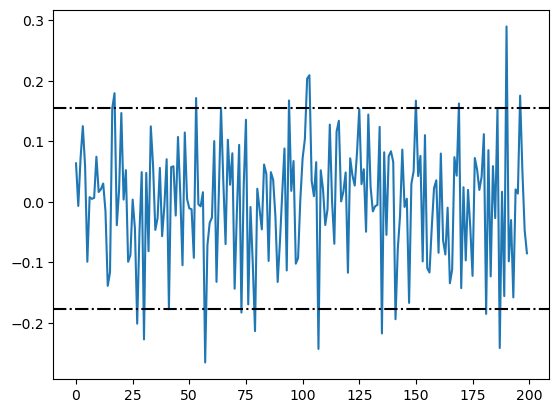

In [38]:
plt.plot(x,y)
plt.axhline(y=q05, color='k', linestyle='-.')
plt.axhline(y=q95, color='k', linestyle='-.')

Come vediamo è improbabile che vengano superati gli intervalli +-30%.
Nella realta le cose vanno un pochino diversamente prendiamo una azione a caso dell'SP500 (non vi dirò mai quale)

In [39]:
stock = pd.read_csv("data/stock_data.csv", index_col=0,parse_dates=True).squeeze("columns") 
ret = stock.pct_change()
ret.dropna(inplace=True)


<Axes: xlabel='Date'>

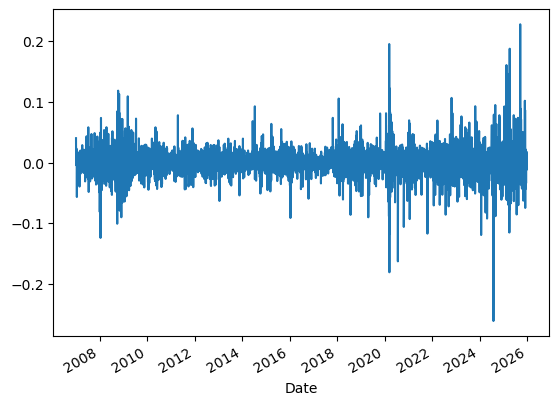

In [40]:
ret.plot(legend=False)

Analizziamo media e varianza per vedere come sono distribuiti i valori

In [41]:
mean = ret.mean()
std = ret.std()

print("Mean {0:.2f} Standard deviation {1:.2f}".format(mean,std))

Mean 0.00 Standard deviation 0.02


Quello che facciamo ora è confrontare la nostra distribuzione dei rendimenti giornalieri con una distribuzione normale con media 0 e deviazione standard 0.02 per vedere quanto questa si discostano

In [42]:
from scipy import stats

def qqplot_scipy(sample):

    fig, ax = plt.subplots(figsize=((12, 7)))

    # probplot calcola i quantili teorici + la retta di best fit
    stats.probplot(sample, dist="norm", plot=ax)

    ax.set_title("Q–Q Plot (Confronto tra rendimenti reali e distribuzione normale)")
    ax.grid(True)

    plt.show()


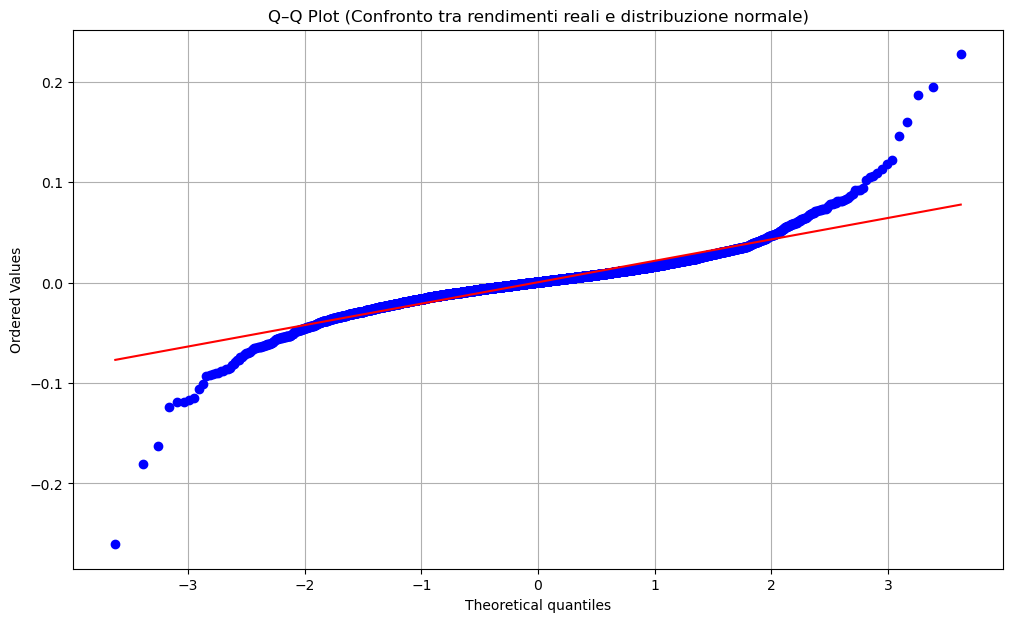

In [43]:
qqplot_scipy(ret)

## Misure di rischio al ribasso

La vera preoccupazione di ogni investitore è la pobabilità di grandi perdite, tradotto la probabilità di grandi rendimenti negativi. Vogliamo andare oltre alla volatilità che è una misura simmetrica (sia nel positivo che nel negativo).

### Volatilità e semideviazione.

La semideviazione è la volatilità di un sottoinsieme dei rendimenti **sotto media** o **negativi**.<br/>
La formula sottostante definisce il concetto di **semideviazione**

$$
    \sigma_{semi} = \sqrt{\frac{1}{N} \sum_{R_t \leq \overline{R}} \left( R_t - \overline{R}  \right)^{2}}
$$

**N** è il numero di elementi che cade sotto la media

<Axes: xlabel='INTC', ylabel='Percent'>

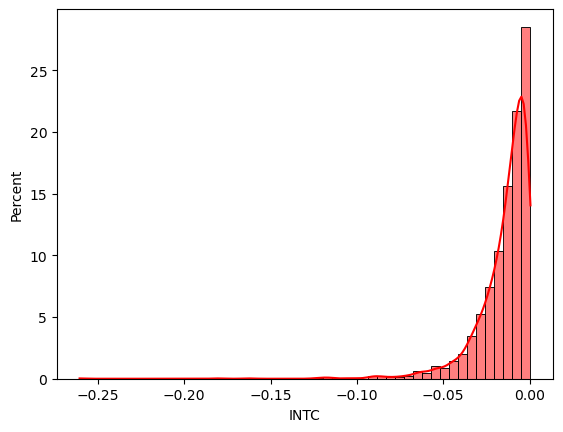

In [44]:
import seaborn as sns

fil = ret <= ret.mean()  

sns.histplot(ret[fil], bins=50, color="r", kde=True, stat="percent")

## Valore a rischio VaR

Il valore a rischio vuol cercare di capire quali sono le grandi perdite che possono spazzare via il nostro portafoglio.
Facendo un esempio pratico un **VaR** del 95% di 1000€ significa che c'è solo il 5% di probabilità di perdere più di 1000€

Facciamo un esempio di calcolo supponiamo di avere un tempo di osservazione pari a 10 giorni (per semplicità di calcolo), i rendimenti giornalieri sono:

* Giorno 1:		0.5%
* Giorno 2:	   -1.2%
* Giorno 3:		0.3%
* Giorno 4:	   -0.7%
* Giorno 5: 	1.0%
* Giorno 6:    -0.4%
* Giorno 7: 	0.8%
* Giorno 8:    -0.9%
* Giorno 9: 	0.2%
* Giorno 10:   -1.5%

Impostiamo il VaR a 95%, come primo passo ordiniamo i rendimenti dal più basso al più alto: -1.5%, -1.2%, -0.9%, -0.7%, -0.4%, 0.2%, 0.3%, 0.5%, 0.8%, 1.0%

Calcoliamo il percentile (100 - 95) prendiamo dunque il 5 percentile con 10 valori dobbiamo dunque prendere i seguenti $k$ valori 
$$
    k=p\cdot(n+1)
$$

**0.05 * 10 = 0.5** va preso dunque il valore tra il primo e il secondo

$$
\frac{-1.5 + -1.2} {2} = -1.35
$$

eistono vari modi per stimare il VaR per quello che dobbiamo fare noi va benissimo usare i dati storici

In [45]:
ret.dropna(inplace=True)
np.percentile(ret,5)

np.float64(-0.03241893769068848)

possiamo con questo codice scrivere una funzione e provare a confrontare il **VaR** tra le due serie storiche LargeCap e SmallCap per fare dei nostri ragionamenti

In [46]:
def calculate_var(return_series: pd.Series,confidence_level:float=0.05):
    return np.percentile(return_series,confidence_level * 100)
    

In [47]:
var_large = calculate_var(returns["LargeCap"])
var_small = calculate_var(returns["SmallCap"])

In [48]:
print("Large Cap Var {0:.2f}% Small Cap Var {1:.2f}%".format(var_large * 100,var_small * 100))

Large Cap Var -7.53% Small Cap Var -10.77%


Ora possiamo porci una ulteriore domanda se le cose andassero veramente male e superiamo il VaR, quanto perderemmo in media?.
A questa domanda risponde il CVaR 

Possiamo dunque unire le due misure in una sola funzione:

In [49]:
def calculate_risk_metrics(returns_series: pd.Series, confidence_level:float=0.05):
    # Il VaR storico è semplicemente il percentile della distribuzione dei rendimenti
    var = np.percentile(returns_series, confidence_level * 100)
    
    # Il CVaR è la media dei rendimenti che sono minori o uguali al VaR
    cvar = returns_series[returns_series <= var].mean()
    
    return var, cvar

In [50]:
var_large,cvar_large = calculate_risk_metrics(returns["LargeCap"])
var_small,cvar_small = calculate_risk_metrics(returns["SmallCap"])

In [51]:
print("Large Cap CVar {0:.2f}% Small Cap CVar {1:.2f}%".format(cvar_large * 100,cvar_small * 100))

Large Cap CVar -12.13% Small Cap CVar -16.26%


Un esercizio interessante potrebbe essere quello di confrontare per lo stesso tipo di intervallo una azione singola dell'indice di aziende con grande capitalizzazione con lo stesso indice e una azione singola dell'indice di aziende con piccola capitalizzazione con lo stesso indice.

Questo serve a introdurre il concetto di **Rischio Sistematico** e **Rischio Idiosincratico**

* Il Rischio Sistematico chiamato anche **Beta** è il rischio del mercato e non possiamo eliminarlo
* Il Rischio Idiosincratico **Alpha** o specifico è il rischio legato ad una singola azienda ad esempio il lancio fallimentare di un nuovo prodotto

Prepariamoci i dati e cominciamo

In [53]:
index = pd.read_csv("data/index.csv", index_col=0,parse_dates=True)

In [54]:
var_large,cvar_large = calculate_risk_metrics(index["SP500"])
var_single,cvar_single = calculate_risk_metrics(index["INTC"])

print(f"VaR Indice (Diversificato): {var_large:.2%}")
print(f"VaR Singolo Titolo (Concentrato): {var_single:.2%}")

VaR Indice (Diversificato): -1.70%
VaR Singolo Titolo (Concentrato): -3.12%


In [55]:
print(f"CVaR Indice: {cvar_large:.2%}")
print(f"CVaR Singolo Titolo: {cvar_single:.2%}")

CVaR Indice: -2.84%
CVaR Singolo Titolo: -4.96%


Facciamo la stessa cosa con un indice small cap e una singola azione dello stesso indice

In [56]:
var_small,cvar_small = calculate_risk_metrics(index["RUSSEL2000"])
var_single,cvar_single = calculate_risk_metrics(index["GME"])

print(f"VaR Indice (Diversificato): {var_small:.2%}")
print(f"VaR Singolo Titolo (Concentrato): {var_single:.2%}")

VaR Indice (Diversificato): -2.25%
VaR Singolo Titolo (Concentrato): -5.14%


In [57]:
print(f"CVaR Indice: {cvar_small:.2%}")
print(f"CVaR Singolo Titolo: {cvar_single:.2%}")

CVaR Indice: -3.47%
CVaR Singolo Titolo: -9.15%


Questo ci porta alla nostra conclusione finale

> In un portafoglio diversificato, il fallimento di un'azienda è una statistica. In un portafoglio di tre titoli, è una tragedia finanziaria.